Data visualization of time series

In [2]:
import torch
import numpy as np
import os
import matplotlib.pyplot as plt 
from scipy.fft import fft, fftfreq

#import pickle
#import scipy

In [3]:
dirname_lst = ['SleepEEG', 'Epilepsy', 'FD_A', 'FD_B', 'HAR', 'Gesture', 'ECG', 'EMG']

In [4]:
def open_dataset(path):
    #Loads in train, val and test datasets
    dall = {}
    train = torch.load(os.path.join(path+"train.pt"))
    val = torch.load(os.path.join(path+"val.pt"))
    test = torch.load(os.path.join(path+"test.pt"))
    dall['samples'] = torch.cat((torch.tensor(train['samples']), torch.tensor(val['samples']), torch.tensor(test['samples'])), dim=0)
    dall['labels'] = torch.cat((train['labels'], val['labels'], test['labels']), dim=0)

    #print("train, val, test shape: ", train["samples"].shape, val["samples"].shape, test["samples"].shape)
    #print("dall samples shape: ", dall['samples'].shape)

    return dall

/tmp/ipykernel_1733728/2694539719.py:7: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  dall['samples'] = torch.cat((torch.tensor(train['samples']), torch.tensor(val['samples']), torch.tensor(test['samples'])), dim=0)


train, val, test shape:  torch.Size([371055, 1, 178]) torch.Size([107730, 1, 178]) torch.Size([90315, 1, 178])
dall samples shape:  torch.Size([569100, 1, 178])
train, val, test shape:  torch.Size([60, 1, 178]) torch.Size([20, 1, 178]) torch.Size([11420, 1, 178])
dall samples shape:  torch.Size([11500, 1, 178])
train, val, test shape:  (8184, 1, 5120) (2728, 1, 5120) (2728, 1, 5120)
dall samples shape:  torch.Size([13640, 1, 5120])
train, val, test shape:  torch.Size([60, 1, 5120]) torch.Size([21, 1, 5120]) torch.Size([13559, 1, 5120])
dall samples shape:  torch.Size([13640, 1, 5120])
train, val, test shape:  torch.Size([5881, 3, 206]) torch.Size([1471, 3, 206]) torch.Size([2947, 3, 206])
dall samples shape:  torch.Size([10299, 3, 206])
train, val, test shape:  torch.Size([320, 3, 206]) torch.Size([120, 3, 206]) torch.Size([120, 3, 206])
dall samples shape:  torch.Size([560, 3, 206])
train, val, test shape:  torch.Size([43673, 1, 1500]) torch.Size([10920, 1, 1500]) torch.Size([1904, 1,

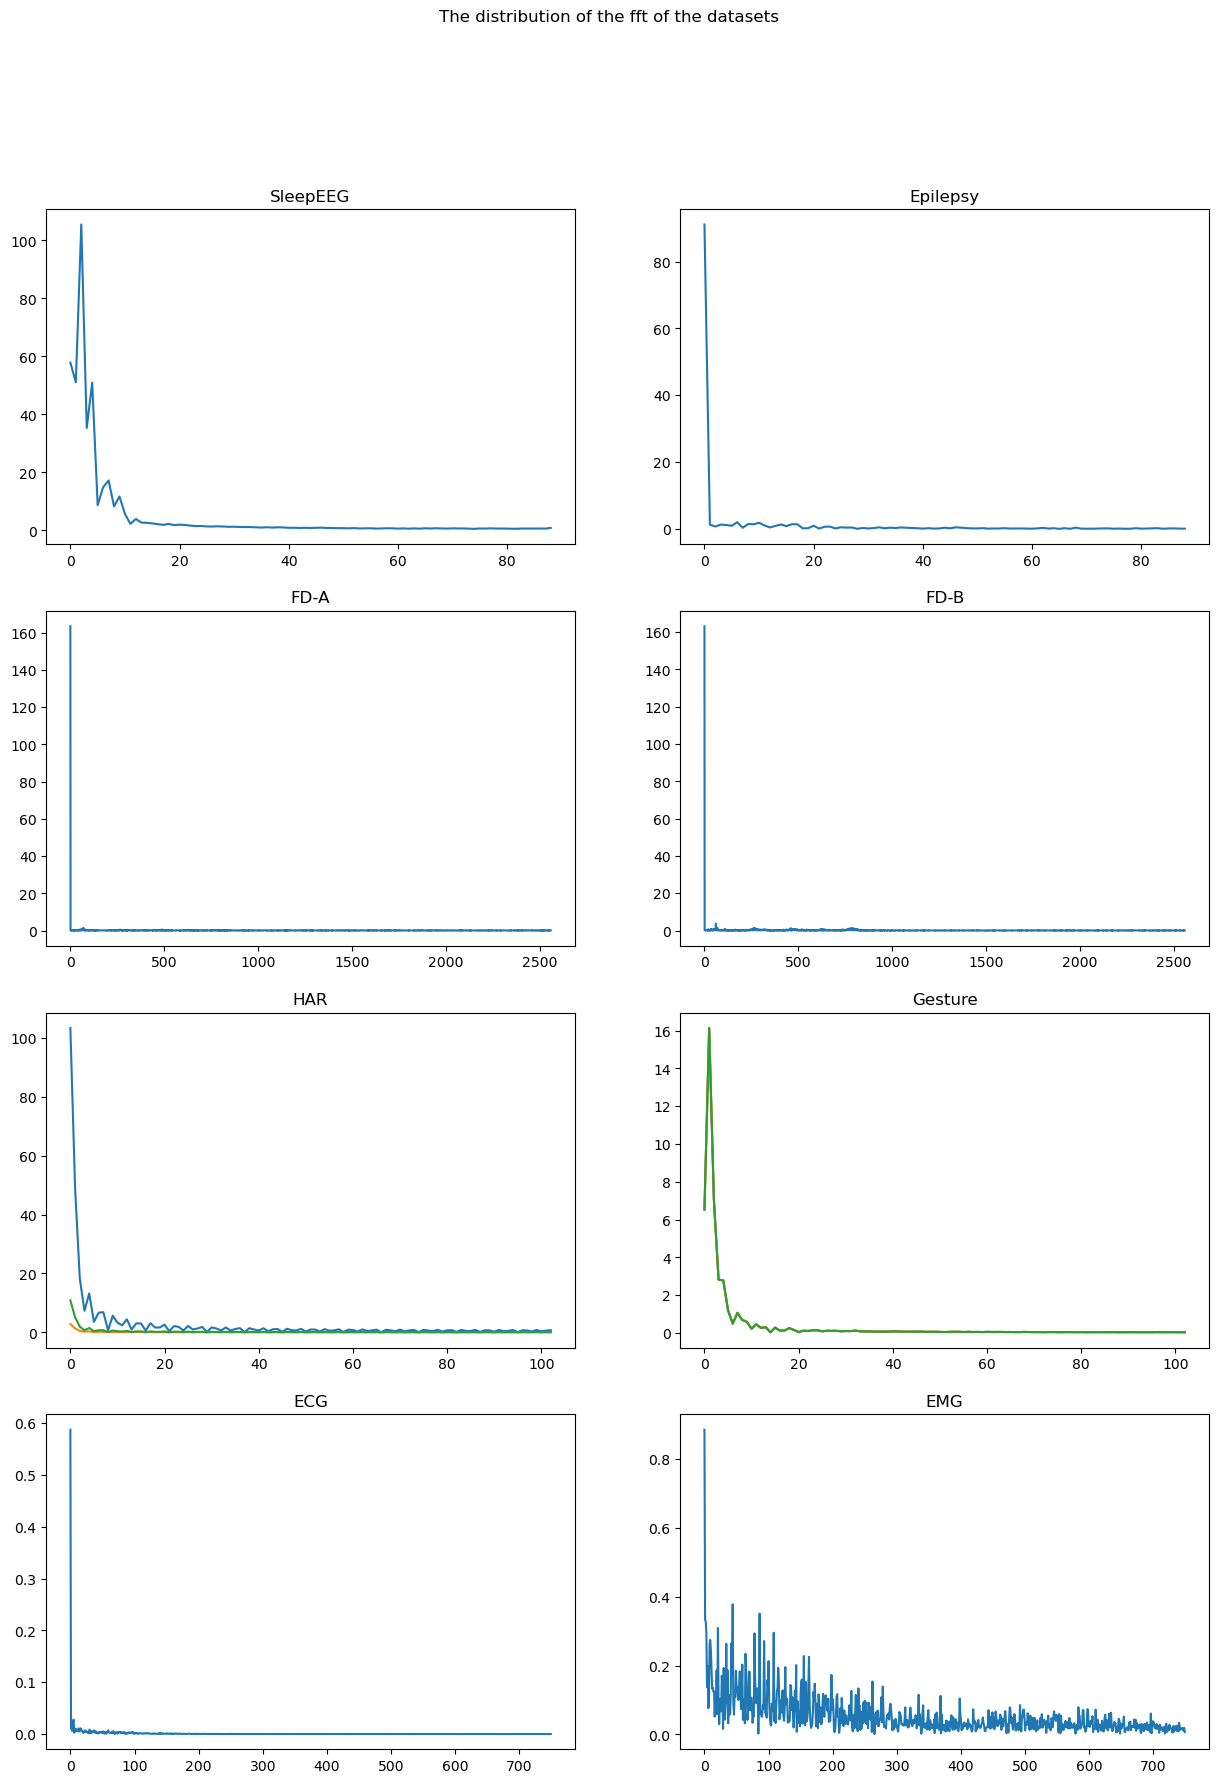

In [37]:
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

fig, axes = plt.subplots(4,2, figsize=(15,20), sharey=False)

fig.suptitle("The distribution of the fft of the datasets")
for dirname, ax in list(zip(dirname_lst, axes.flatten())):
    data_dict = open_dataset(f"datasets/{dirname}/")
    time_samples = np.array(data_dict['samples'][:,:,:])
    freq_samples = fft(time_samples)
    freq_samples = freq_samples.mean(axis=0)
    N = freq_samples.shape[1]
    xf = fftfreq(N, 1/N)[0:N//2]
    #rng = min(N//2 , 20)
    YF = np.abs(freq_samples[:,0:N//2])
    #xf = xf[0:rng]
    ax.set_title(f"{dirname}")
    for i in range(freq_samples.shape[0]):
        ax.plot(xf,YF[i,:])

In [6]:
path = "datasets/FD-A/"
sleep_eeg_train = open_dataset(path)
print(sleep_eeg_train['samples'][0,0,:])

[0.07629395 0.01220703 0.01525879 ... 0.04577637 0.0213623  0.03662109]


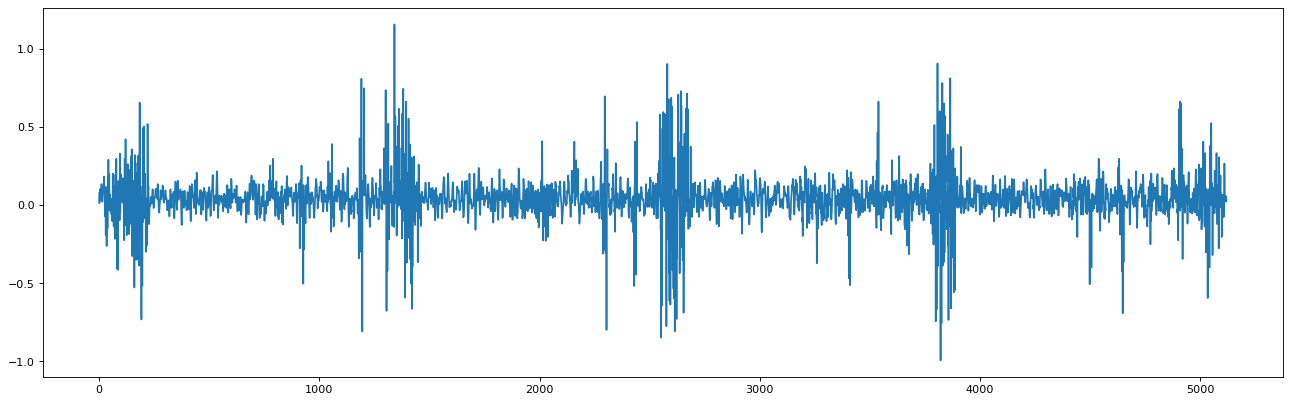

In [7]:
from matplotlib.pyplot import figure

figure(figsize=(20, 6), dpi=80)
#print(sleep_eeg_train['samples'].shape)
plt.plot(sleep_eeg_train['samples'][0,0,:])

In [8]:
import matplotlib.pyplot as plt 
from scipy.fft import fft, fftfreq

time_samples = np.array(sleep_eeg_train['samples'][:,:,:])
freq_samples = fft(time_samples)
print(freq_samples.shape)
freq_samples = freq_samples.mean(axis=0)
print(freq_samples.shape)
#print(freq_samples[:,:])

(2728, 1, 5120)
(1, 5120)


N:  5120
[[0.10208437 0.22821165 0.10907945 ... 0.33362403 0.16848411 0.06513345]]


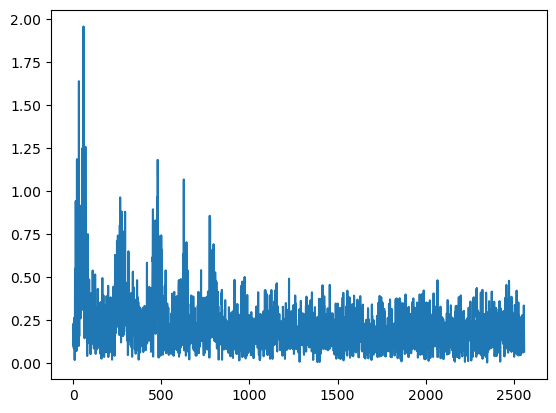

In [9]:
N = freq_samples.shape[1]
print("N: ", N)
xf = fftfreq(N, 1/N)[1:N//2]
YF = np.abs(freq_samples[:,1:N//2])
print(YF)
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"
plt.plot(xf,YF[0,:])
#plt.plot(xf,YF[1])
#plt.plot(xf,YF[2])

(2728, 5120)
(2560, 2728)


<Axes: >

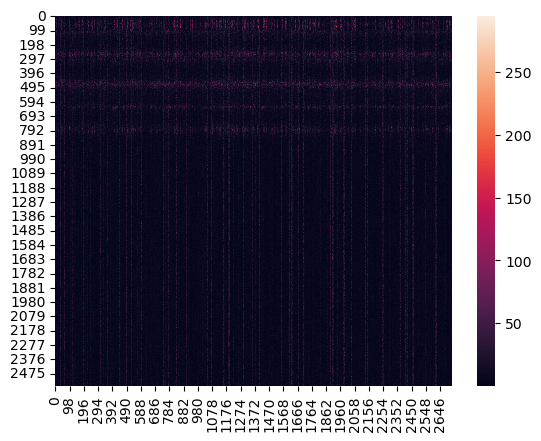

In [19]:
from seaborn import heatmap
freq_samples = fft(time_samples)
freq_samples = freq_samples.reshape(freq_samples.shape[0],freq_samples.shape[2])
print(freq_samples.shape)
freq_samples = np.abs(freq_samples[:,0:N//2])
freq_samples = freq_samples.transpose((1,0))
print(freq_samples.shape)
display(heatmap(freq_samples))

/tmp/ipykernel_1733728/2694539719.py:7: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  dall['samples'] = torch.cat((torch.tensor(train['samples']), torch.tensor(val['samples']), torch.tensor(test['samples'])), dim=0)


train, val, test shape:  torch.Size([371055, 1, 178]) torch.Size([107730, 1, 178]) torch.Size([90315, 1, 178])
dall samples shape:  torch.Size([569100, 1, 178])
(569100, 178)


/tmp/ipykernel_1733728/2694539719.py:7: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  dall['samples'] = torch.cat((torch.tensor(train['samples']), torch.tensor(val['samples']), torch.tensor(test['samples'])), dim=0)


train, val, test shape:  torch.Size([60, 1, 178]) torch.Size([20, 1, 178]) torch.Size([11420, 1, 178])
dall samples shape:  torch.Size([11500, 1, 178])
(11500, 178)
train, val, test shape:  (8184, 1, 5120) (2728, 1, 5120) (2728, 1, 5120)
dall samples shape:  torch.Size([13640, 1, 5120])
(13640, 5120)


/tmp/ipykernel_1733728/2694539719.py:7: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  dall['samples'] = torch.cat((torch.tensor(train['samples']), torch.tensor(val['samples']), torch.tensor(test['samples'])), dim=0)


train, val, test shape:  torch.Size([60, 1, 5120]) torch.Size([21, 1, 5120]) torch.Size([13559, 1, 5120])
dall samples shape:  torch.Size([13640, 1, 5120])
(13640, 5120)


/tmp/ipykernel_1733728/2694539719.py:7: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  dall['samples'] = torch.cat((torch.tensor(train['samples']), torch.tensor(val['samples']), torch.tensor(test['samples'])), dim=0)


train, val, test shape:  torch.Size([5881, 3, 206]) torch.Size([1471, 3, 206]) torch.Size([2947, 3, 206])
dall samples shape:  torch.Size([10299, 3, 206])
(10299, 206)


/tmp/ipykernel_1733728/2694539719.py:7: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  dall['samples'] = torch.cat((torch.tensor(train['samples']), torch.tensor(val['samples']), torch.tensor(test['samples'])), dim=0)


train, val, test shape:  torch.Size([320, 3, 206]) torch.Size([120, 3, 206]) torch.Size([120, 3, 206])
dall samples shape:  torch.Size([560, 3, 206])
(560, 206)


/tmp/ipykernel_1733728/2694539719.py:7: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  dall['samples'] = torch.cat((torch.tensor(train['samples']), torch.tensor(val['samples']), torch.tensor(test['samples'])), dim=0)


train, val, test shape:  torch.Size([43673, 1, 1500]) torch.Size([10920, 1, 1500]) torch.Size([1904, 1, 1500])
dall samples shape:  torch.Size([56497, 1, 1500])
(56497, 1500)


/tmp/ipykernel_1733728/2694539719.py:7: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  dall['samples'] = torch.cat((torch.tensor(train['samples']), torch.tensor(val['samples']), torch.tensor(test['samples'])), dim=0)


train, val, test shape:  torch.Size([122, 1, 1500]) torch.Size([41, 1, 1500]) torch.Size([41, 1, 1500])
dall samples shape:  torch.Size([204, 1, 1500])
(204, 1500)


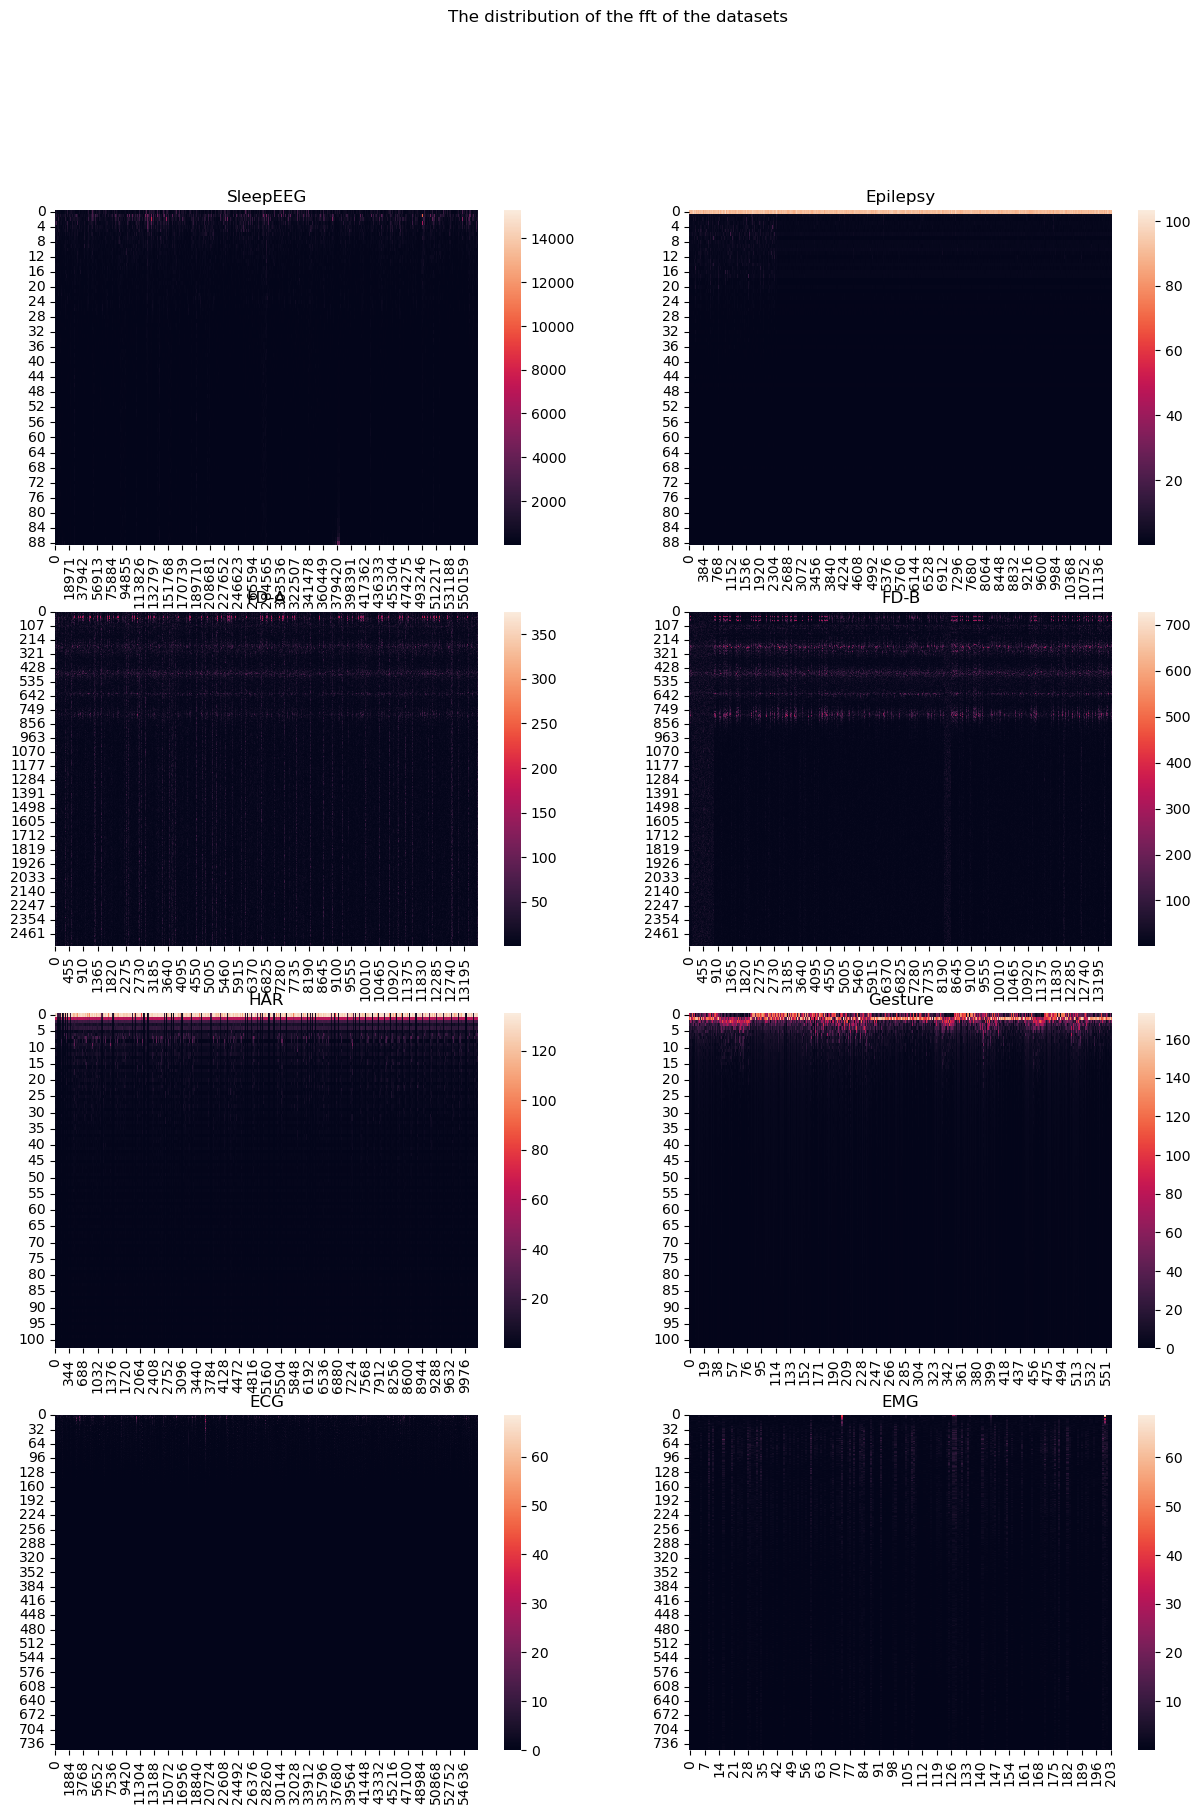

In [38]:
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

fig, axes = plt.subplots(4,2, figsize=(15,20), sharey=False)

fig.suptitle("The distribution of the fft of the datasets")
for dirname, ax in list(zip(dirname_lst, axes.flatten())):
    data_dict = open_dataset(f"datasets/{dirname}/")
    time_samples = np.array(data_dict['samples'][:,:,:])
    freq_samples = fft(time_samples)
    freq_samples = freq_samples[:,0,:]
    #print(freq_samples.shape)
    #freq_samples = freq_samples.reshape(freq_samples.shape[0],freq_samples.shape[2])
    print(freq_samples.shape)
    N = freq_samples.shape[1]
    freq_samples = np.abs(freq_samples[:,0:N//2])
    freq_samples = freq_samples.transpose((1,0))
    heatmap(freq_samples, ax=ax)
    ax.set_title(f"{dirname}")


## Data similarities analysis

Let's asses out thinking:
Most importantly we want to compare two time series dataset. 
One way would be somekind of squared distance (Euclidean). 
Main problem: Different sampling frequencies, hard to compare.
Solution: under sampling the higher ferquency time series? There might have been a reason for high frequency sampling --> important for the trending 
Idea: Let's concatenate the datasamples after each other and observe how much the time series changed for eg. via fourier transform 
Original solution: use the pretraining dataset as anchor and zeropad or undersample the fourier representation thus creating time-series of equal length

I wanna compare the fourier transform for each pair of dataset. 

After that, based on the comparison, I want to choose a pair for which the distance is small 
and use one of the dataset for pretraining and use the other for fine-tuning. 

In [5]:
import itertools
import numpy as np
from sklearn.metrics import mean_squared_error 
import pandas as pd
import collections
from scipy.fft import fft, fftfreq

mse_data = collections.defaultdict(dict)

for (pre, fine) in itertools.permutations(dirname_lst, 2):
    #Load in the data
    pre_data = open_dataset(f"datasets/{pre}/")
    fine_data = open_dataset(f"datasets/{fine}/")
    #print("Datasets loaded")
    
    #data_dict = open_dataset(f"datasets/{dirname}/")
    pre_time_samples = np.array(pre_data['samples'][:,0,:])
    fine_time_samples = np.array(fine_data['samples'][:,0,:])

    pre_freq_samples = fft(pre_time_samples)
    fine_freq_samples = fft(fine_time_samples)
    
    pre_freq_samples_mean = pre_freq_samples.mean(axis=0)
    fine_freq_samples_mean = fine_freq_samples.mean(axis=0)

    #print("freq_samples_shape: ", pre_freq_samples_mean.shape)
    N_pre = pre_freq_samples_mean.shape[0]
    N_fine = pre_freq_samples_mean.shape[0]

    pre_fourier_samples = np.abs(pre_freq_samples_mean[0:N_pre//2])
    fine_fourier_samples = np.abs(fine_freq_samples_mean[0:N_fine//2])

    N_pre = pre_fourier_samples.shape[0]
    N_fine = fine_fourier_samples.shape[0]

    if N_fine < N_pre:
        fine_fourier_samples = np.pad(fine_fourier_samples, (0,N_pre - N_fine), mode="constant", constant_values=0)
    elif N_pre < N_fine:
        fine_freq_samples = fine_fourier_samples[:N_pre]
        #pre_fourier_samples = np.pad(pre_fourier_samples, (0, N_fine - N_pre), mode="constant", constant_values=0) 
    
    MSE = mean_squared_error(pre_fourier_samples, fine_fourier_samples)
    mse_data[pre][fine] = MSE
    #mse_data[fine][pre] = MSE

df = pd.DataFrame.from_records(mse_data)
df = df.reindex(dirname_lst, axis=1)

/tmp/ipykernel_3935164/1786238868.py:7: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  dall['samples'] = torch.cat((torch.tensor(train['samples']), torch.tensor(val['samples']), torch.tensor(test['samples'])), dim=0)
/tmp/ipykernel_3935164/1786238868.py:7: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  dall['samples'] = torch.cat((torch.tensor(train['samples']), torch.tensor(val['samples']), torch.tensor(test['samples'])), dim=0)
/tmp/ipykernel_3935164/1786238868.py:7: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  dall['samples'] = torch.ca

In [6]:
df = pd.DataFrame.from_records(mse_data)
df = df.reindex(dirname_lst, axis=1)
df = df.reindex(dirname_lst, axis=0)
df.fillna(0)

,SleepEEG,Epilepsy,FD_A,FD_B,HAR,Gesture,ECG,EMG
SleepEEG,0.000000,212.722978,18.782389,18.767455,118.486748,172.314245,53.739172,53.402814
Epilepsy,212.722978,0.000000,2.080390,2.091328,30.203997,72.168165,11.004916,10.917236
FD_A,332.580276,59.228140,0.000000,0.028615,66.199187,242.411230,35.415995,35.277470
FD_B,331.660691,58.792943,0.028615,0.000000,65.809632,241.488982,35.354264,35.203941
HAR,137.109314,34.917710,3.931323,3.941378,0.000000,106.506550,22.804782,22.592071
Gesture,199.366659,83.519231,9.890108,9.881994,106.506550,0.000000,0.927016,0.895810
ECG,244.786023,92.385924,10.382279,10.372412,134.387573,3.541556,0.000000,0.005620
EMG,242.529942,91.690577,10.340880,10.327128,133.055844,3.335689,0.005620,0.000000


(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5]),
 [Text(0.5, 0, 'SleepEEG'),
  Text(1.5, 0, 'Epilepsy'),
  Text(2.5, 0, 'FD_A'),
  Text(3.5, 0, 'FD_B'),
  Text(4.5, 0, 'HAR'),
  Text(5.5, 0, 'Gesture'),
  Text(6.5, 0, 'ECG'),
  Text(7.5, 0, 'EMG')])

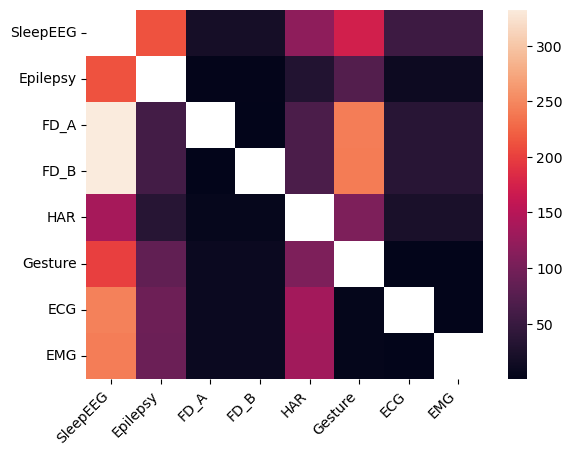

In [8]:
import seaborn as sns

a = sns.heatmap(df)
plt.xticks(rotation=45, ha='right')

Interesting results. 
Based on this FD-A and FD-B pretraining sets would be the best for almost every dataset. 
Although one problem is still unsolved: How do I manage the training for different sample length

In [10]:
fig = a.get_figure()
fig.savefig("dataset_comparisons.png",bbox_inches="tight")